In [66]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as ppl
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display
# from IPython.display import HTML
# style = "<style>svg{width:50% !important;height:30% !important;}</style>"
# HTML(style)
# graph = Source(tree.export_graphviz(mytree, out_file=None,
#                                    feature_names=list(X_train),
#                                    class_names=['Negative','Positive'],
#                                    filled = True))

# display(SVG(graph.pipe(format='svg')))

In [67]:
data_train = pd.read_csv('dogs_n_cats.csv')
data_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [68]:
mytree = tree.DecisionTreeClassifier(criterion='entropy')
X_train = data_train.iloc[:, :4]
y_train = data_train.iloc[:, 4]
mytree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
seek_range = range(1, 101)
cross_val_scores = []

for i in seek_range:
    np.random.seed(i)
    mytree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    mytree.fit(X_train, y_train)
    cross_val_scores.append(cross_val_score(mytree, X_train, y_train, cv=5).mean())


In [70]:
# cross_val_scores

In [71]:
optimal_depth = cross_val_scores.index(max(cross_val_scores))+1
optimal_depth

1

[Text(0.5, 0.75, 'Высота <= 11.8\nentropy = 0.999\nsamples = 1000\nvalue = [516, 484]'),
 Text(0.25, 0.25, 'entropy = 0.242\nsamples = 500\nvalue = [20, 480]'),
 Text(0.75, 0.25, 'entropy = 0.067\nsamples = 500\nvalue = [496, 4]')]

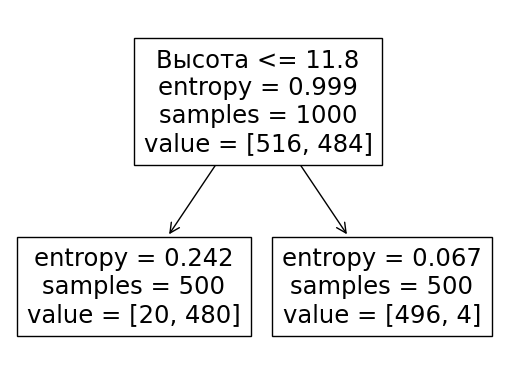

In [72]:
mytree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth)
mytree.fit(X_train, y_train)
tree.plot_tree(mytree, feature_names=data_train.columns)

In [73]:
cross_val_score(mytree, X=X_train, y=y_train, cv=5)

array([0.98, 1.  , 1.  , 1.  , 0.9 ])

In [81]:
data_test = pd.read_json('dataset_209691_15.txt')
X_test = data_test.iloc[:, :4]
X_test

,Длина,Высота,Шерстист,Гавкает
0,20,24.0,1,1
1,31,37.2,1,1
2,21,25.2,1,0
3,18,21.6,1,1
4,15,18.0,1,0
...,...,...,...,...
95,9,3.6,1,0
96,9,3.6,1,0
97,9,3.6,1,0
98,10,4.0,1,0


In [87]:
prediction = pd.Series(mytree.predict(X_test))
prediction

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64

In [90]:
prediction.sum()

48